In [ ]:
#Importação das bibliotecas
import numpy as np
import math
import matplotlib.pyplot as plt

Vamos analisar o conceito de relação sinal-ruído (SNR) e procurar visualizar como ela afeta os sinais em um sistema de comunicação. Para isso, vamos gerar sinais digitais e simular a adição de um ruído com diferentes potências.

In [ ]:
#Vamos procurar analisar os nossos sinais de interesse ao longo de um segundo, representado pela variável tf a seguir:

tf = 1 # duração da simulação, em segundos

# Além disso, vamos considerar a transmissão de N = 100 bits, o que vai nos levar a uma taxa de 100bps. Esse valor não é 
# realista para uma aplicação prática, mas foi adotado para fins didáticos, a fim de permitir uma visualização confortável 
# dos nossos sinais de interesse.

N = 100 # Número de bits na sequência

A seguir, vamos gerar de forma aleatória uma sequência com 100 bits e imprimir na tela o resultado. A sequência é gerada de forma que, a cada bit novo sorteado, os valores 0 e 1 tenham cada um 50% de chance de ocorrer.

In [ ]:
bits = np.zeros(N)
for i in range(N):
    bits[i] = np.rint(np.random.uniform(0,1,1))
print(bits)

Vamos agora gerar um sinal digital para transmitir a sequência de bits gerada anteriormente. Esse processo de converter uma sequência de bits em um sinal elétrico ou eletromagnético digital é chamado de codificação de linha. Existem várias técnicas de codificação de linha possíveis, e vamos estudá-las nas aulas seguintes. Aqui, vamos adotar a codificação NRZ-L, mas você não precisa se preocupar com isso ainda. Como veremos posteriormente, nessa técnica, o bit 0 faz com que o nosso sinal digital assuma tensão positiva (+1 V) por um certo período de tempo, ao passo que o bit 1 faz com que o nosso sinal  assuma uma tensão negativa (-1 V). Observe, portanto, que um sinal digital resultante dessa codificação de linha tem L = 2 níveis.
Além disso, como o computador não consegue lidar com sinais de tempo contínuo, vamos definir um período de amostragem ts, e calcular o valor dos nossos sinais a cada ts segundos. Aqui, estamos adotando ts = 1 microssegundo.

In [ ]:
ts = 1e-6 # período de amostragem (em segundos)

# Criação de um vetor de tempo:
t = np.arange(0,tf,ts)

# Inicialização do nosso sinal digital
sinal_transmitido_NRZL = np.zeros(len(t))

# Cálculo do tempo de bit (duração de cada bit no nosso sinal digital):
tempo_bit = tf/N

#Geração do sinal propriamente dito:
for i in range(len(t)):
    n = int(t[i]//tempo_bit)
    sinal_transmitido_NRZL[i] = -2*bits[n]+1

Vamos agora plotar o sinal obtido:

In [ ]:
plt.rcdefaults()
plt.plot(t,sinal_transmitido_NRZL,'b')
plt.grid()
plt.show

# Exemplo: SNR de 40 dB

Vamos agora calcular a potência média do sinal gerado anteriormente. Nas aulas, não entramos em detalhes neste aspecto, porque foge um pouco do escopo deste curso, mas a potência média $\bar{P}$ de um sinal real $x(t)$ entre dois instantes de tempo $t_0$ e $t_f$ é dada por (OPPENHEIM, 1997) $$\bar{P} = \dfrac{1}{t_f - t_0} \int_{t_0}^{t_f}x^2(t)dt,$$
em que $t$ é o tempo.

OPPENHEIM, Alan V. Sinais e sistemas. Prentice-Hall, 2010.

No nosso caso, vamos aproximar a integral por um somatório. Considerando $t_0 = 0$, obtemos:

In [ ]:
Potencia_sinal = np.sum(np.square(sinal_transmitido_NRZL))*ts/tf
#Imprimento na tela:
print("Potência do sinal =", Potencia_sinal, "(em W).")

Vamos considerar incialmente uma SNR de 40 dB. Neste caso, podemos calcular a potência média do ruído que, junto com a potência calculada anteriormente para o nosso sinal, leva a essa SNR. Temos:

In [ ]:
SNR_dB = 40 #(em dB)

Como $$\text{SNR}_{\text{dB}} = 10\log_{10}\left(\dfrac{P_{\text{sinal}}}{P_{\text{ruído}}}\right),$$ fazendo algumas manipulações algébricas obtemos $$P_{\text{ruído}} = \dfrac{P_{\text{sinal}}}{10^{\frac{\text{SNR}_{\text{dB}}}{10}}}.$$ Logo:

In [ ]:
Potencia_ruido = Potencia_sinal/(10**(SNR_dB/10))

Conhecendo a potência que o ruído deve ter, podemos gerá-lo sinteticamente. Considerando que o nosso ruído seja aleatório com uma distribuição Gaussiana e média nula, podemos controlar sua potência alterando seu desvio padrão. É possível mostrar que, neste caso, sua variância deve ser igual à potência pretendida, que obtivemos anteriormente. Assim, podemos gerá-lo da seguinte forma:

In [ ]:
#Geração do ruído:
ruido = np.random.normal(0,np.sqrt(Potencia_ruido),len(t))
#Plotando o ruído gerado:
plt.rcdefaults()
plt.plot(t,ruido,'b')
plt.grid()
plt.show

Antes de prosseguir, podemos calcular a potência média do ruído gerado para nos certificarmos de que de fato estamos obtendo a SNR desejada para a nossa simulação, de 40 dB. Temos:

In [ ]:
#Cálculo da potência média do ruído efetivamente gerado na nossa simulação:
Potencia_ruido_medida = np.sum(np.square(ruido))*ts/tf
SNR_medida = 10*math.log10(Potencia_sinal/Potencia_ruido_medida)
print("SNR medida =", SNR_medida, "dB.")

Observe que o resultado é, de fato, aproximadamente 40 dB.

Em geral, o sinal que é transmitido por um dispositivo sempre chega ao seu destino modificado, em maior ou menor grau, pelos efeitos do canal de comunicação e pela existência do ruído. Essa situação é esquematizada no diagrama a seguir. 

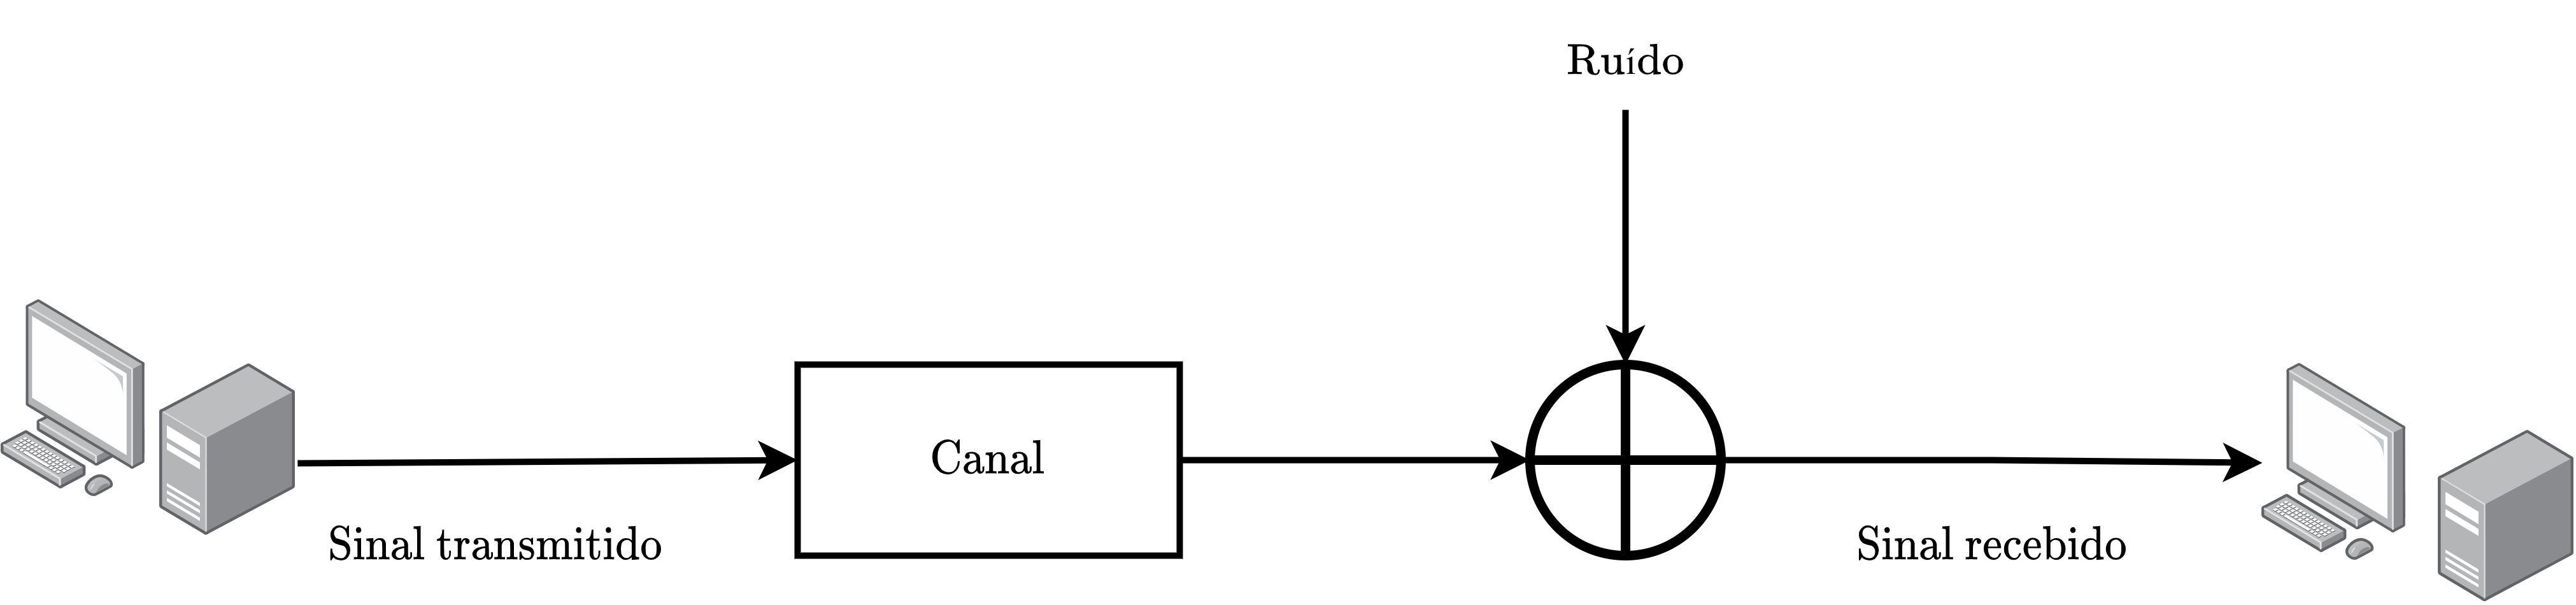

Nesta simulação, como estamos interessados sobretudo em estudar o efeito do ruído de medição, vamos considerar que o canal é ideal, ou seja, não altera em nada o sinal transmitido pelo emissor. Desta forma, a única transformação pela qual o nosso sinal enviado vai passar é a adição do ruído, como ilustrado a seguir.

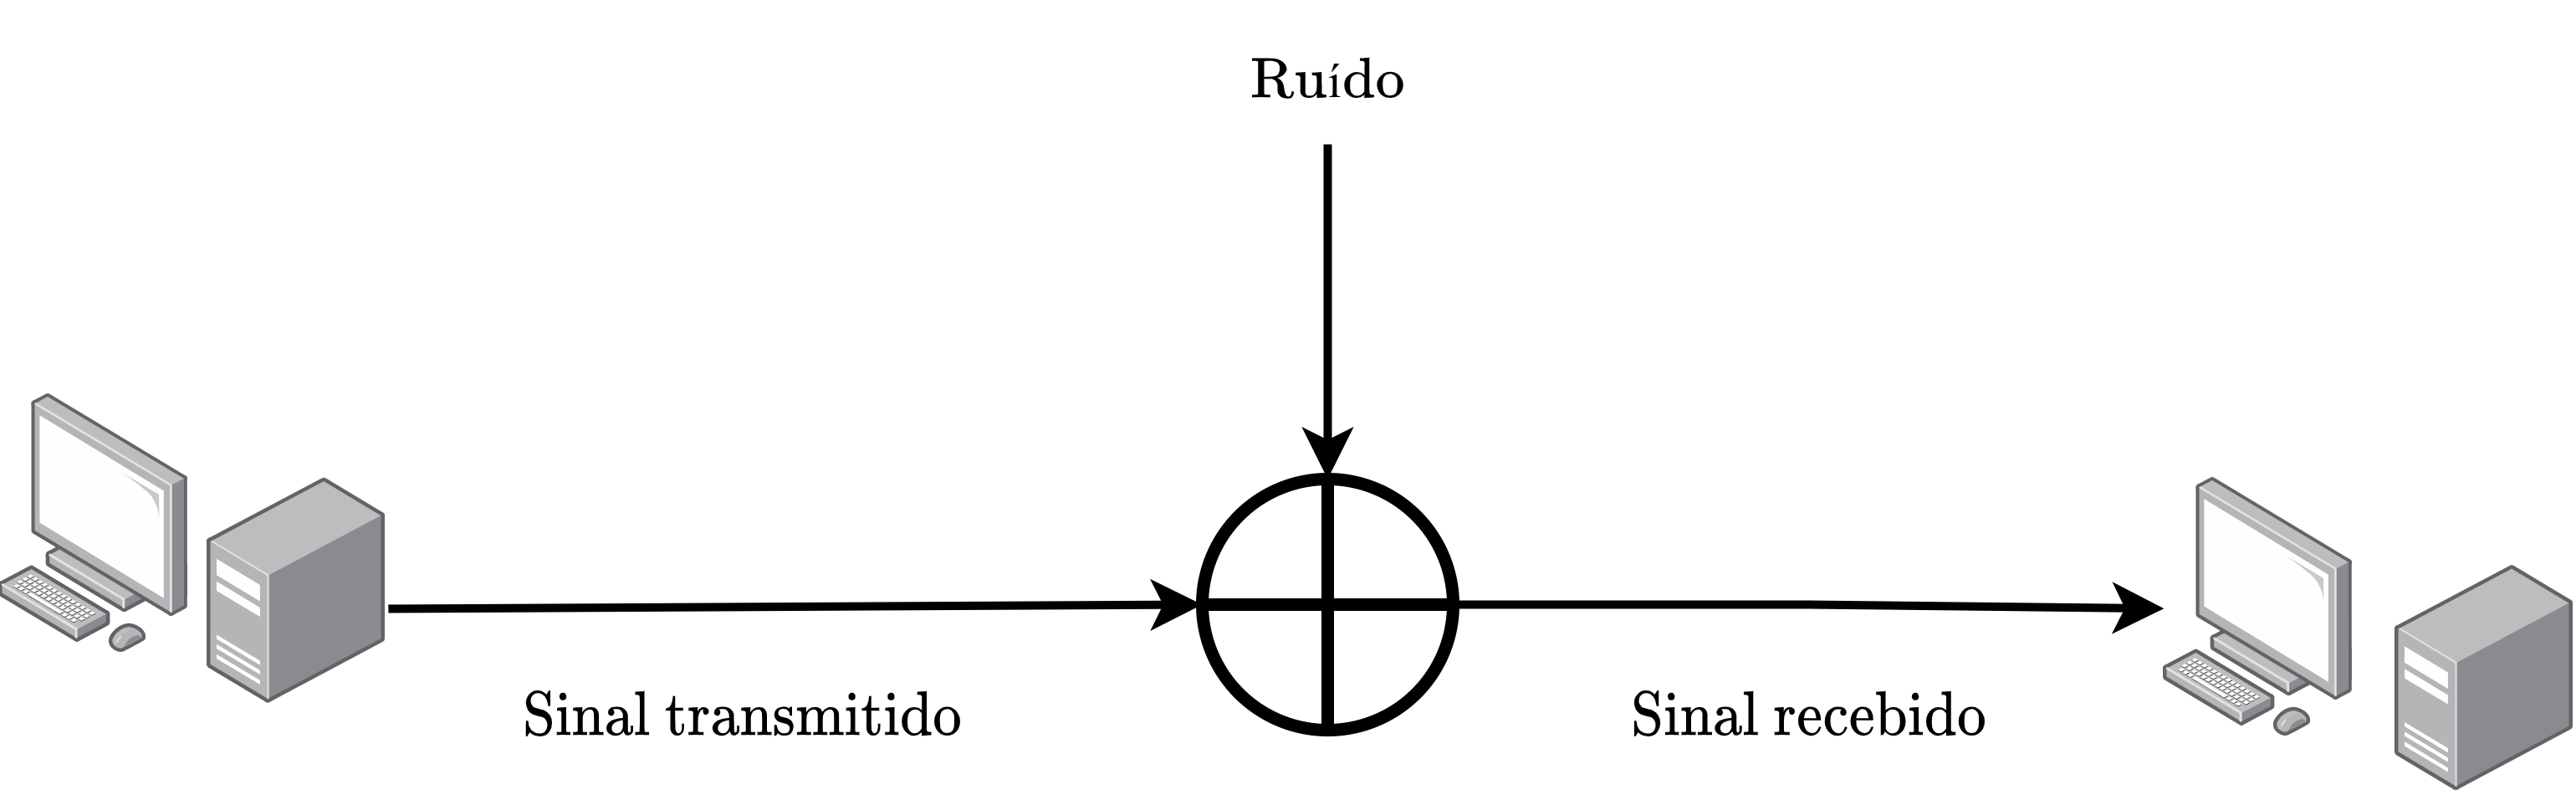

Vamos procurar visualizar, então, qual é o efeito da adição do ruído sobre o sinal recebido. Assim, teremos:

In [ ]:
#Cálculo do sinal recebido:
sinal_recebido = sinal_transmitido_NRZL + ruido
# Plotando o resultado, junto com o sinal originalmente transmitido:
plt.rcdefaults()
plt.plot(t,sinal_recebido,'r',label='Sinal Recebido')
plt.plot(t,sinal_transmitido_NRZL,'b',label='Sinal Recebido')
plt.grid()
plt.legend(loc='right')
plt.show

Para melhor visualização, vamos dar um "zoom" nos instantes iniciais agora:

In [ ]:
# Plotando o resultado, junto com o sinal originalmente transmitido:
plt.rcdefaults()
plt.plot(t,sinal_recebido,'r',label='Sinal Recebido')
plt.plot(t,sinal_transmitido_NRZL,'b',label='Sinal Transmitido')
plt.axis([0, 0.1, -1.1, 1.1])
plt.grid()
plt.legend(loc='right')
plt.show
plt.show

Observe que o sinal recebido neste caso oscila levemente em torno dos níveis do sinal transmitido, mas é relativamente "fácil" dizer se em um determinado momento o sinal está assumindo um nível "alto" (tensão positiva, correspondente ao bit 0) ou "baixo" (tensão negativa, correspondente ao bit 1). Mas e se a SNR fosse diferente?

# Influência do valor da SNR

Sem mexer no sinal transmitido, vamos repetir a experiência anterior, mas agora considerando seis cenários diferentes, cada um com um nível de SNR entre 40 dB e -10 dB. Teremos, neste caso:

In [ ]:
SNR1_dB = 40 # em dB
SNR2_dB = 30 # em dB
SNR3_dB = 20 # em dB
SNR4_dB = 10 # em dB
SNR5_dB = 0 # em dB
SNR6_dB = -10 # em dB

Para cada valor de SNR, teremos uma potência correspondente para o ruído. Repetindo o procedimento que utilizamos para calcular a variável "Potencia_ruido" anteriormente:

In [ ]:
P_ruido1 = Potencia_sinal/(10**(SNR1_dB/10))
print("Potência do ruído para obter uma SNR de",SNR1_dB," dB:",P_ruido1,"W")
P_ruido2 = Potencia_sinal/(10**(SNR2_dB/10))
print("Potência do ruído para obter uma SNR de",SNR2_dB," dB:",P_ruido2,"W")
P_ruido3 = Potencia_sinal/(10**(SNR3_dB/10))
print("Potência do ruído para obter uma SNR de",SNR3_dB," dB:",P_ruido3,"W")
P_ruido4 = Potencia_sinal/(10**(SNR4_dB/10))
print("Potência do ruído para obter uma SNR de",SNR4_dB," dB:",P_ruido4,"W")
P_ruido5 = Potencia_sinal/(10**(SNR5_dB/10))
print("Potência do ruído para obter uma SNR de",SNR5_dB," dB:",P_ruido5,"W")
P_ruido6 = Potencia_sinal/(10**(SNR6_dB/10))
print("Potência do ruído para obter uma SNR de",SNR6_dB," dB:",P_ruido6,"W")

Vamos agora gerar seis versões do ruído sinteticamente, cada uma com a potência calculada anteriormente.

In [ ]:
ruido1 = np.random.normal(0,np.sqrt(P_ruido1),len(t))
ruido2 = np.random.normal(0,np.sqrt(P_ruido2),len(t))
ruido3 = np.random.normal(0,np.sqrt(P_ruido3),len(t))
ruido4 = np.random.normal(0,np.sqrt(P_ruido4),len(t))
ruido5 = np.random.normal(0,np.sqrt(P_ruido5),len(t))
ruido6 = np.random.normal(0,np.sqrt(P_ruido6),len(t))

Antes de prosseguir, vamos nos certificar de que as SNRs batem com o que pretendemos:

In [ ]:
#Cálculo da potência média dos ruídos efetivamente gerado na nossa simulação:

Potencia_ruido_medida_1 = np.sum(np.square(ruido1))*ts/tf
SNR_medida1 = 10*math.log10(Potencia_sinal/Potencia_ruido_medida_1)
print("SNR medida =", SNR_medida1, "dB.")

Potencia_ruido_medida_2 = np.sum(np.square(ruido2))*ts/tf
SNR_medida2 = 10*math.log10(Potencia_sinal/Potencia_ruido_medida_2)
print("SNR medida =", SNR_medida2, "dB.")

Potencia_ruido_medida_3 = np.sum(np.square(ruido3))*ts/tf
SNR_medida3 = 10*math.log10(Potencia_sinal/Potencia_ruido_medida_3)
print("SNR medida =", SNR_medida3, "dB.")

Potencia_ruido_medida_4 = np.sum(np.square(ruido4))*ts/tf
SNR_medida4 = 10*math.log10(Potencia_sinal/Potencia_ruido_medida_4)
print("SNR medida =", SNR_medida4, "dB.")

Potencia_ruido_medida_5 = np.sum(np.square(ruido5))*ts/tf
SNR_medida5 = 10*math.log10(Potencia_sinal/Potencia_ruido_medida_5)
print("SNR medida =", SNR_medida5, "dB.")

Potencia_ruido_medida_6 = np.sum(np.square(ruido6))*ts/tf
SNR_medida6 = 10*math.log10(Potencia_sinal/Potencia_ruido_medida_6)
print("SNR medida =", SNR_medida6, "dB.")

Dado que as SNRs bateram (aproximadamente), vamos plotar as seis versões do ruído de medição. Para permitir uma melhor comparação, todos os plots foram feitos com a mesma escala no eixo y.

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]



# Plotando as portadoras:
fig = plt.figure()
ax1 = plt.subplot2grid((4, 3), (0, 0), rowspan=2, colspan=1)
ax1.plot(t,ruido1,'-b')
plt.title('Ruído 1 (SNR = 40 dB)')
plt.xlabel('t (s)')
plt.axis([0, 1, -15, 15])
ax1.grid()


ax2 = plt.subplot2grid((4, 3), (0, 1), rowspan=2, colspan=1)
ax2.plot(t,ruido2,'-b')
plt.title('Ruído 2 (SNR = 30 dB)')
plt.xlabel('t (s)')
plt.axis([0, 1, -15, 15])
plt.grid()


ax3 = plt.subplot2grid((4, 3), (0, 2), rowspan=2, colspan=1)
ax3.plot(t,ruido3,'-b')
plt.title('Ruído 3 (SNR = 20 dB)')
plt.xlabel('t (s)')
plt.axis([0, 1, -15, 15])
plt.grid()


ax4 = plt.subplot2grid((4, 3), (2, 0), rowspan=2, colspan=1)
ax4.plot(t,ruido4,'-b')
plt.title('Ruído 4 (SNR = 10 dB)')
plt.xlabel('t (s)')
plt.axis([0, 1, -15, 15])
plt.grid()


ax5 = plt.subplot2grid((4, 3), (2, 1), rowspan=2, colspan=1)
ax5.plot(t,ruido5,'-b')
plt.title('Ruído 5 (SNR = 0 dB)')
plt.xlabel('t (s)')
plt.axis([0, 1, -15, 15])
plt.grid()

ax6 = plt.subplot2grid((4, 3), (2, 2), rowspan=2, colspan=1)
ax6.plot(t,ruido6,'-b')
plt.title('Ruído 6 (SNR = -10 dB)')
plt.xlabel('t (s)')
plt.axis([0, 1, -15, 15])
plt.grid()


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=1)

Feito isso, vamos finalmente calcular o sinal recebido em cada caso e visualizá-los. Inicialmente, vamos plotá-los sem o sinal transmitido, para ver se visualmente conseguimos "decifrar" qual é o nível do sinal em cada caso (obs.: note que neste caso não estamos adotando a mesma escala no eixo y para todos os plots).

In [ ]:
#Cálculo dos sinais recebidos:
sinal_recebido1 = sinal_transmitido_NRZL + ruido1
sinal_recebido2 = sinal_transmitido_NRZL + ruido2
sinal_recebido3 = sinal_transmitido_NRZL + ruido3
sinal_recebido4 = sinal_transmitido_NRZL + ruido4
sinal_recebido5 = sinal_transmitido_NRZL + ruido5
sinal_recebido6 = sinal_transmitido_NRZL + ruido6


plt.rcdefaults()



# Plotando as portadoras:
fig = plt.figure()
plt.plot(t,sinal_recebido1,'-r')
plt.title('SNR = 40 dB')
plt.xlabel('t (s)')
plt.grid()

fig = plt.figure()
plt.plot(t,sinal_recebido2,'-r')
plt.title('SNR = 30 dB')
plt.xlabel('t (s)')
plt.grid()

fig = plt.figure()
plt.plot(t,sinal_recebido3,'-r')
plt.title('Ruído 3 (SNR = 20 dB)')
plt.xlabel('t (s)')
plt.grid()

fig = plt.figure()
plt.plot(t,sinal_recebido4,'-r')
plt.title('SNR = 10 dB')
plt.xlabel('t (s)')
plt.grid()

fig = plt.figure()
plt.plot(t,sinal_recebido5,'-r')
plt.title('SNR = 0 dB')
plt.xlabel('t (s)')
plt.grid()

fig = plt.figure()
plt.plot(t,sinal_recebido6,'-r')
plt.title('SNR = -10 dB')
plt.xlabel('t (s)')
plt.grid()

Observe que, em linhas gerais, para SNRs acima de 20 dB, não é difícil dizer se o nível do sinal recebido ao longo de um determinado tempo de bit é alto ou baixo. Para uma SNR de 10 dB, fazer essa distinção visualmente começa a se tornar um pouco mais desafiador, o que é agravado quando olhamos para o cenário com uma SNR de 0 dB. Se a SNR for de -10 dB, ao menos visualmente, é praticamente impossível avaliar qual é o nível do nosso sinal recebido. A seguir, plotamos os sinais lado a lado, mas agora o sinal transmitido também é exibido, para facilitar a interpretação dos resultados.

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]



# Plotando as portadoras:
fig = plt.figure()
ax1 = plt.subplot2grid((4, 3), (0, 0), rowspan=2, colspan=1)
ax1.plot(t,sinal_recebido1,'-r')
ax1.plot(t,sinal_transmitido_NRZL,'-b')
plt.title('SNR = 40 dB')
plt.xlabel('t (s)')
ax1.grid()


ax2 = plt.subplot2grid((4, 3), (0, 1), rowspan=2, colspan=1)
ax2.plot(t,sinal_recebido2,'-r')
ax2.plot(t,sinal_transmitido_NRZL,'-b')
plt.title('SNR = 30 dB')
plt.xlabel('t (s)')
plt.grid()


ax3 = plt.subplot2grid((4, 3), (0, 2), rowspan=2, colspan=1)
ax3.plot(t,sinal_recebido3,'-r')
ax3.plot(t,sinal_transmitido_NRZL,'-b')
plt.title('Ruído 3 (SNR = 20 dB)')
plt.xlabel('t (s)')
plt.grid()


ax4 = plt.subplot2grid((4, 3), (2, 0), rowspan=2, colspan=1)
ax4.plot(t,sinal_recebido4,'-r')
ax4.plot(t,sinal_transmitido_NRZL,'-b')
plt.title('SNR = 10 dB')
plt.xlabel('t (s)')
plt.grid()


ax5 = plt.subplot2grid((4, 3), (2, 1), rowspan=2, colspan=1)
ax5.plot(t,sinal_recebido5,'-r')
ax5.plot(t,sinal_transmitido_NRZL,'-b')
plt.title('SNR = 0 dB')
plt.xlabel('t (s)')
plt.grid()

ax6 = plt.subplot2grid((4, 3), (2, 2), rowspan=2, colspan=1)
ax6.plot(t,sinal_recebido6,'-r')
ax6.plot(t,sinal_transmitido_NRZL,'-b')
plt.title('SNR = -10 dB')
plt.xlabel('t (s)')
plt.grid()


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=1)

O experimento anterior ilustra o quanto a existência do ruído pode dificultar o processo de decodificação do sinal recebido por um dispositivo. Quando a SNR é relativamente elevada, não é difícil avaliar qual é o nível do sinal recebido, mas quanto menor a SNR, mais desafiadora se torna a tarefa de decodificar o sinal corretamente.

# E se aumentarmos o número de níveis do sinal digital?

Nos nossos experimentos anteriores, convertemos a sequência de bits em um sinal segundo a técnica NRZ-L, que produz sinais digitais com L = 2 níveis. Vamos verificar agora o que ocorre se transmitirmos essa mesma sequência de bits utilizando um sinal digital com L = 4 níveis. Ao fazer isso, podemos (em princípio) dobrar a taxa de transmissão em comparação com o cenário em que usamos um sinal digital com apenas dois níveis, se analisarmos a taxa de transferência de Nyquist. Ou seja, podemos transmitir a mesma mensagem em metade do tempo. Como exemplo, vamos adotar a codificação 2B1Q, que será explicada nas próximas aulas. Não se preocupe demais em entender a geração do sinal neste momento. 

Neste caso, teremos:

In [ ]:
tf = 0.5 # duração da simulação, em segundos

ts = 1e-6 # período de amostragem (em segundos)

# Criação de um vetor de tempo:
t = np.arange(0,tf,ts)

# Inicialização do nosso sinal digital
sinal_transmitido_2B1Q = np.zeros(len(t))

# Cálculo do tempo de bit (duração de cada bit no nosso sinal digital):
tempo_bit = tf/N

n = np.arange(0,tf,2*tempo_bit)
nivel_anterior = 1
#Geração do sinal propriamente dito:
cont = 0
seq_transmitida = []
for i in range(len(t)):
    if cont<len(n)-1: 
        if t[i] >= n[cont]:
            bit1 = str(int(bits[2*cont]))
            bit2 = str(int(bits[2*cont+1]))
            seq = bit1 +bit2
            seq_transmitida.append(seq)
            if seq == '00':
                if np.sign(nivel_anterior) == 1:
                    proximo_nivel = 1
                else:
                    proximo_nivel = -1
            elif seq == '01':
                if np.sign(nivel_anterior) == 1:
                    proximo_nivel = 3
                else:
                    proximo_nivel = -3                
            elif seq == '10':
                if np.sign(nivel_anterior) == 1:
                    proximo_nivel = -1
                else:
                    proximo_nivel = 1                   
            else:
                if np.sign(nivel_anterior) == 1:
                    proximo_nivel = -3
                else:
                    proximo_nivel = 3
            nivel_anterior = proximo_nivel
            sinal_transmitido_2B1Q[i] = proximo_nivel
            cont += 1
        else:
            sinal_transmitido_2B1Q[i] = sinal_transmitido_2B1Q[i-1]            
    else:
        sinal_transmitido_2B1Q[i] = sinal_transmitido_2B1Q[i-1] 

Vamos plotar o sinal. Observe que ele consiste em um sinal digital que pode assumir os níveis -3V, -1V, 1V ou 3V.

In [ ]:
plt.rcdefaults()
plt.plot(t,sinal_transmitido_2B1Q,'b')
plt.grid()
plt.show

Feito isso, vamos calcular novamente a potência do sinal, seguindo o mesmo procedimento que tínhamos adotado para o sinal gerado utilizando a codificação NRZ-L:

In [ ]:
Potencia_sinal = np.sum(np.square(sinal_transmitido_2B1Q))*ts/tf
#Imprimento na tela:
print("Potência do sinal =", Potencia_sinal, "(em W).")

Mais uma vez, vamos considerar seis valores para a SNR, os mesmos utilizados no experimento anterior:

In [ ]:
SNR1_dB = 40 # em dB
SNR2_dB = 30 # em dB
SNR3_dB = 20 # em dB
SNR4_dB = 10 # em dB
SNR5_dB = 0 # em dB
SNR6_dB = -10 # em dB

A seguir, vamos recalcular qual deve ser a potência do ruído em cada cenário para obter a SNR pretendida:

In [ ]:
P_ruido1 = Potencia_sinal/(10**(SNR1_dB/10))
print("Potência do ruído para obter uma SNR de",SNR1_dB," dB:",P_ruido1,"W")
P_ruido2 = Potencia_sinal/(10**(SNR2_dB/10))
print("Potência do ruído para obter uma SNR de",SNR2_dB," dB:",P_ruido2,"W")
P_ruido3 = Potencia_sinal/(10**(SNR3_dB/10))
print("Potência do ruído para obter uma SNR de",SNR3_dB," dB:",P_ruido3,"W")
P_ruido4 = Potencia_sinal/(10**(SNR4_dB/10))
print("Potência do ruído para obter uma SNR de",SNR4_dB," dB:",P_ruido4,"W")
P_ruido5 = Potencia_sinal/(10**(SNR5_dB/10))
print("Potência do ruído para obter uma SNR de",SNR5_dB," dB:",P_ruido5,"W")
P_ruido6 = Potencia_sinal/(10**(SNR6_dB/10))
print("Potência do ruído para obter uma SNR de",SNR6_dB," dB:",P_ruido6,"W")

Gerando os ruídos sinteticamente, obtemos:

In [ ]:
ruido1 = np.random.normal(0,np.sqrt(P_ruido1),len(t))
ruido2 = np.random.normal(0,np.sqrt(P_ruido2),len(t))
ruido3 = np.random.normal(0,np.sqrt(P_ruido3),len(t))
ruido4 = np.random.normal(0,np.sqrt(P_ruido4),len(t))
ruido5 = np.random.normal(0,np.sqrt(P_ruido5),len(t))
ruido6 = np.random.normal(0,np.sqrt(P_ruido6),len(t))

Vamos nos certificar de que as SNRs obtidas com os ruídos gerados coincidem com aquilo que pretendíamos:

In [ ]:
#Cálculo da potência média dos ruídos efetivamente gerado na nossa simulação:

Potencia_ruido_medida_1 = np.sum(np.square(ruido1))*ts/tf
SNR_medida1 = 10*math.log10(Potencia_sinal/Potencia_ruido_medida_1)
print("SNR medida =", SNR_medida1, "dB.")

Potencia_ruido_medida_2 = np.sum(np.square(ruido2))*ts/tf
SNR_medida2 = 10*math.log10(Potencia_sinal/Potencia_ruido_medida_2)
print("SNR medida =", SNR_medida2, "dB.")

Potencia_ruido_medida_3 = np.sum(np.square(ruido3))*ts/tf
SNR_medida3 = 10*math.log10(Potencia_sinal/Potencia_ruido_medida_3)
print("SNR medida =", SNR_medida3, "dB.")

Potencia_ruido_medida_4 = np.sum(np.square(ruido4))*ts/tf
SNR_medida4 = 10*math.log10(Potencia_sinal/Potencia_ruido_medida_4)
print("SNR medida =", SNR_medida4, "dB.")

Potencia_ruido_medida_5 = np.sum(np.square(ruido5))*ts/tf
SNR_medida5 = 10*math.log10(Potencia_sinal/Potencia_ruido_medida_5)
print("SNR medida =", SNR_medida5, "dB.")

Potencia_ruido_medida_6 = np.sum(np.square(ruido6))*ts/tf
SNR_medida6 = 10*math.log10(Potencia_sinal/Potencia_ruido_medida_6)
print("SNR medida =", SNR_medida6, "dB.")

Feito isso, vamos simular como seria o sinal recebido em cada caso, ao somar o ruído ao sinal transmitido:

In [ ]:
#Cálculo dos sinais recebidos:
sinal_recebido1 = sinal_transmitido_2B1Q + ruido1
sinal_recebido2 = sinal_transmitido_2B1Q + ruido2
sinal_recebido3 = sinal_transmitido_2B1Q + ruido3
sinal_recebido4 = sinal_transmitido_2B1Q + ruido4
sinal_recebido5 = sinal_transmitido_2B1Q + ruido5
sinal_recebido6 = sinal_transmitido_2B1Q + ruido6


plt.rcdefaults()



# Plotando as portadoras:
fig = plt.figure()
plt.plot(t,sinal_recebido1,'-r')
plt.title('SNR = 40 dB')
plt.xlabel('t (s)')
plt.grid()

fig = plt.figure()
plt.plot(t,sinal_recebido2,'-r')
plt.title('SNR = 30 dB')
plt.xlabel('t (s)')
plt.grid()

fig = plt.figure()
plt.plot(t,sinal_recebido3,'-r')
plt.title('Ruído 3 (SNR = 20 dB)')
plt.xlabel('t (s)')
plt.grid()

fig = plt.figure()
plt.plot(t,sinal_recebido4,'-r')
plt.title('SNR = 10 dB')
plt.xlabel('t (s)')
plt.grid()

fig = plt.figure()
plt.plot(t,sinal_recebido5,'-r')
plt.title('SNR = 0 dB')
plt.xlabel('t (s)')
plt.grid()

fig = plt.figure()
plt.plot(t,sinal_recebido6,'-r')
plt.title('SNR = -10 dB')
plt.xlabel('t (s)')
plt.grid()